In [220]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import matplotlib


In [149]:
csv_test = pd.read_csv('LPOINT_BIG_COMP\\LPOINT_BIG_COMP_02_PDDE.csv',index_col='de_dt',parse_dates=True)

C:\Users\ko980\AppData\Local\Temp\ipykernel_16052\1973610382.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_test = pd.read_csv('LPOINT_BIG_COMP\\LPOINT_BIG_COMP_02_PDDE.csv',index_col='de_dt',parse_dates=True)


In [150]:
csv_test

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_hr,buy_am,buy_ct
de_dt,,,,,,,,,
2021-01-01,M430112881,A01000001113,1,A01,A010039,PD0290,10,15000.0,1
2021-01-01,M646853852,A01000002265,1,A01,A010025,PD1369,10,79700.0,1
2021-01-01,M430112881,A01000003148,1,A01,A010039,PD0290,10,19000.0,1
2021-01-01,M430112881,A01000003148,1,A01,A010039,PD0290,10,19000.0,1
2021-01-01,M430112881,A01000004946,1,A01,A010039,PD0290,10,19000.0,1
...,...,...,...,...,...,...,...,...,...
2021-12-31,M533286446,E06052119978,2,A06,NaN,PD0507,23,50000.0,1
2021-12-31,M533286446,E06052119978,2,A06,NaN,PD0507,23,50000.0,1
2021-12-31,M533286446,E06052119978,2,A06,NaN,PD0507,23,50000.0,1


In [151]:
buy_all=csv_test.drop(columns=['cust','rct_no','chnl_dv','cop_c','pd_c','br_c','de_hr'])
buy_all

,buy_am,buy_ct
de_dt,,
2021-01-01,15000.0,1
2021-01-01,79700.0,1
2021-01-01,19000.0,1
2021-01-01,19000.0,1
2021-01-01,19000.0,1
...,...,...
2021-12-31,50000.0,1
2021-12-31,50000.0,1
2021-12-31,50000.0,1


In [152]:
buy_all_1=buy_all.groupby(['de_dt']).sum()
print(buy_all_1)
# buy_all['de_dt']=pd.to_datetime(buy_all['de_dt'])
# print(buy_all,'\n')
# buy_all_1=buy_all.groupby(['de_dt']).sum()
# print(buy_all_1)
# print(buy_all_2)
# buy_all_3.astype({'buy_am':"int"})


                 buy_am  buy_ct
de_dt                          
2021-01-01  126123613.0   18115
2021-01-02  471031604.0   23177
2021-01-03  449962233.0   18684
2021-01-04  216811768.0   17849
2021-01-05  162848415.0   15634
...                 ...     ...
2021-12-27  176634477.0   13364
2021-12-28  215869962.0   12346
2021-12-29  189792088.0   12808
2021-12-30  198250002.0   14751
2021-12-31  322994170.0   19912

[365 rows x 2 columns]


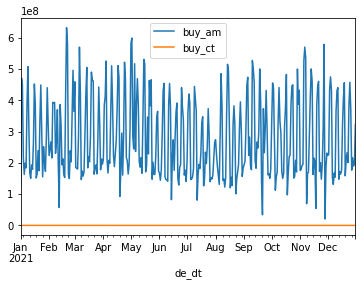

In [153]:
fig=buy_all_1.plot()

In [154]:
train_data,test_data=train_test_split(buy_all_1,test_size=0.2,shuffle=False)


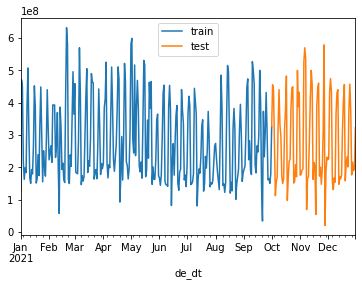

In [155]:
split_date = pd.Timestamp('10-01-2021')
# 2011/1/1 까지의 데이터를 트레이닝셋.
# 그 이후 데이터를 테스트셋으로 한다.

train = buy_all_1.loc[:split_date, ['buy_am']]
test = buy_all_1.loc[split_date:, ['buy_am']]
# Feature는 Unadjusted 한 개

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])


In [156]:
sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

array([[0.1540718 ],
       [0.73096112],
       [0.69572072],
       [0.30575581],
       [0.2154973 ],
       [0.27548579],
       [0.25059451],
       [0.59197588],
       [0.79207431],
       [0.47419609],
       [0.22365177],
       [0.19499526],
       [0.26624406],
       [0.24351728],
       [0.39225206],
       [0.69935152],
       [0.59047007],
       [0.19664776],
       [0.21704859],
       [0.34330517],
       [0.23516676],
       [0.5023433 ],
       [0.69387838],
       [0.4529498 ],
       [0.20264565],
       [0.36343791],
       [0.2831671 ],
       [0.23222822],
       [0.40489706],
       [0.67937259],
       [0.48387282],
       [0.31656006],
       [0.3541278 ],
       [0.38971429],
       [0.30350766],
       [0.60086298],
       [0.59955008],
       [0.60058781],
       [0.32865613],
       [0.38866012],
       [0.56142007],
       [0.27065828],
       [0.03879417],
       [0.58935412],
       [0.48109625],
       [0.26713269],
       [0.29930639],
       [0.213

In [157]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()


,Scaled
de_dt,
2021-01-01,0.154072
2021-01-02,0.730961
2021-01-03,0.695721
2021-01-04,0.305756
2021-01-05,0.215497


In [158]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

train_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
de_dt,,,,,,,,,,,,,
2021-01-01,0.154072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,0.730961,0.154072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,0.695721,0.730961,0.154072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,0.305756,0.695721,0.730961,0.154072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.215497,0.305756,0.695721,0.730961,0.154072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,0.275486,0.215497,0.305756,0.695721,0.730961,0.154072,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07,0.250595,0.275486,0.215497,0.305756,0.695721,0.730961,0.154072,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-08,0.591976,0.250595,0.275486,0.215497,0.305756,0.695721,0.730961,0.154072,NaN,NaN,NaN,NaN,NaN
2021-01-09,0.792074,0.591976,0.250595,0.275486,0.215497,0.305756,0.695721,0.730961,0.154072,NaN,NaN,NaN,NaN


In [200]:
X_train[:,0]

array([0.19499526, 0.26624406, 0.24351728, 0.39225206, 0.69935152,
       0.59047007, 0.19664776, 0.21704859, 0.34330517, 0.23516676,
       0.5023433 , 0.69387838, 0.4529498 , 0.20264565, 0.36343791,
       0.2831671 , 0.23222822, 0.40489706, 0.67937259, 0.48387282,
       0.31656006, 0.3541278 , 0.38971429, 0.30350766, 0.60086298,
       0.59955008, 0.60058781, 0.32865613, 0.38866012, 0.56142007,
       0.27065828, 0.03879417, 0.58935412, 0.48109625, 0.26713269,
       0.29930639, 0.21365745, 0.1992355 , 0.65138586, 1.        ,
       0.91623921, 0.21695459, 0.19387088, 0.34248731, 0.28283932,
       0.52718857, 0.77253031, 0.55254309, 0.71101506, 0.25214161,
       0.24888137, 0.24448875, 0.42193894, 0.89629416, 0.65260037,
       0.18805254, 0.23460146, 0.20651645, 0.22982162, 0.44747436,
       0.64558048, 0.78819343, 0.25077319, 0.31149971, 0.28319829,
       0.41855682, 0.76289867, 0.7177711 , 0.71585316, 0.21693481,
       0.25384089, 0.26663174, 0.21866601, 0.40135398, 0.68343

In [199]:
list=[1,2,3],[4,5,6],[7,8,9]
a=np.array(list)
a[:,0]


array([1, 4, 7])

In [193]:
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [159]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [160]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
de_dt,,,,,,,,,,,,
2021-01-13,0.194995,0.223652,0.474196,0.792074,0.591976,0.250595,0.275486,0.215497,0.305756,0.695721,0.730961,0.154072
2021-01-14,0.266244,0.194995,0.223652,0.474196,0.792074,0.591976,0.250595,0.275486,0.215497,0.305756,0.695721,0.730961
2021-01-15,0.243517,0.266244,0.194995,0.223652,0.474196,0.792074,0.591976,0.250595,0.275486,0.215497,0.305756,0.695721
2021-01-16,0.392252,0.243517,0.266244,0.194995,0.223652,0.474196,0.792074,0.591976,0.250595,0.275486,0.215497,0.305756
2021-01-17,0.699352,0.392252,0.243517,0.266244,0.194995,0.223652,0.474196,0.792074,0.591976,0.250595,0.275486,0.215497


In [161]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values 
y_test = y_test.values
print(X_train.shape)
print(X_train)



(262, 12)
[[0.19499526 0.22365177 0.47419609 ... 0.69572072 0.73096112 0.1540718 ]
 [0.26624406 0.19499526 0.22365177 ... 0.30575581 0.69572072 0.73096112]
 [0.24351728 0.26624406 0.19499526 ... 0.2154973  0.30575581 0.69572072]
 ...
 [0.21958841 0.21355558 0.4622405  ... 0.60571002 0.77969828 0.44307556]
 [0.19489356 0.21958841 0.21355558 ... 0.17751288 0.60571002 0.77969828]
 [0.24268672 0.19489356 0.21958841 ... 0.         0.17751288 0.60571002]]


In [162]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)
print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(262, 12, 1)
[[[0.19499526]
  [0.22365177]
  [0.47419609]
  ...
  [0.69572072]
  [0.73096112]
  [0.1540718 ]]

 [[0.26624406]
  [0.19499526]
  [0.22365177]
  ...
  [0.30575581]
  [0.69572072]
  [0.73096112]]

 [[0.24351728]
  [0.26624406]
  [0.19499526]
  ...
  [0.2154973 ]
  [0.30575581]
  [0.69572072]]

 ...

 [[0.21958841]
  [0.21355558]
  [0.4622405 ]
  ...
  [0.60571002]
  [0.77969828]
  [0.44307556]]

 [[0.19489356]
  [0.21958841]
  [0.21355558]
  ...
  [0.17751288]
  [0.60571002]
  [0.77969828]]

 [[0.24268672]
  [0.19489356]
  [0.21958841]
  ...
  [0.        ]
  [0.17751288]
  [0.60571002]]]
[[0.26624406]
 [0.24351728]
 [0.39225206]
 [0.69935152]
 [0.59047007]
 [0.19664776]
 [0.21704859]
 [0.34330517]
 [0.23516676]
 [0.5023433 ]
 [0.69387838]
 [0.4529498 ]
 [0.20264565]
 [0.36343791]
 [0.2831671 ]
 [0.23222822]
 [0.40489706]
 [0.67937259]
 [0.48387282]
 [0.31656006]
 [0.3541278 ]
 [0.38971429]
 [0.30350766]
 [0.60086298]
 [0.59955008]
 [0.60058781]
 [0.32865613]
 [0.388

In [163]:
K.clear_session()
model = Sequential() # Sequeatial Model
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, feature)
model.add(Dense(1)) # output = 1
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [212]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1)

Epoch 1/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0495
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0470
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0464
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0457
Epoch 11/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0454
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0450
Epoch 13/100
9/9 [==============================] - 0s 3ms/st

In [165]:
print(X_test_t)

[[[ 0.23122319]
  [ 0.43940824]
  [ 0.49845397]
  [ 0.68039487]
  [ 0.49529737]
  [ 0.22707448]
  [ 0.20199024]
  [ 0.13100826]
  [ 0.40563178]
  [ 0.67589448]
  [ 0.70477952]
  [ 0.48953936]]

 [[ 0.19435406]
  [ 0.23122319]
  [ 0.43940824]
  [ 0.49845397]
  [ 0.68039487]
  [ 0.49529737]
  [ 0.22707448]
  [ 0.20199024]
  [ 0.13100826]
  [ 0.40563178]
  [ 0.67589448]
  [ 0.70477952]]

 [[ 0.21939209]
  [ 0.19435406]
  [ 0.23122319]
  [ 0.43940824]
  [ 0.49845397]
  [ 0.68039487]
  [ 0.49529737]
  [ 0.22707448]
  [ 0.20199024]
  [ 0.13100826]
  [ 0.40563178]
  [ 0.67589448]]

 [[ 0.47285619]
  [ 0.21939209]
  [ 0.19435406]
  [ 0.23122319]
  [ 0.43940824]
  [ 0.49845397]
  [ 0.68039487]
  [ 0.49529737]
  [ 0.22707448]
  [ 0.20199024]
  [ 0.13100826]
  [ 0.40563178]]

 [[ 0.57262088]
  [ 0.47285619]
  [ 0.21939209]
  [ 0.19435406]
  [ 0.23122319]
  [ 0.43940824]
  [ 0.49845397]
  [ 0.68039487]
  [ 0.49529737]
  [ 0.22707448]
  [ 0.20199024]
  [ 0.13100826]]

 [[ 0.75013686]
  [ 0.57262088

In [213]:
y_pred = model.predict(X_test_t)
print(y_pred)

3/3 [==============================] - 0s 2ms/step
[[0.17561388]
 [0.26243636]
 [0.46898562]
 [0.6299993 ]
 [0.605244  ]
 [0.42194748]
 [0.28506142]
 [0.22279519]
 [0.30328646]
 [0.46989962]
 [0.5706906 ]
 [0.534396  ]
 [0.37528092]
 [0.263021  ]
 [0.25165558]
 [0.38391417]
 [0.57813376]
 [0.6607515 ]
 [0.5134918 ]
 [0.33043328]
 [0.21731526]
 [0.21294126]
 [0.36553547]
 [0.5759872 ]
 [0.65104073]
 [0.48848984]
 [0.28299108]
 [0.191767  ]
 [0.22706136]
 [0.447707  ]
 [0.6524324 ]
 [0.71350634]
 [0.5357926 ]
 [0.2992127 ]
 [0.14098367]
 [0.12623188]
 [0.33812153]
 [0.6187066 ]
 [0.734073  ]
 [0.5681021 ]
 [0.35248938]
 [0.1901479 ]
 [0.1464765 ]
 [0.26818556]
 [0.4923239 ]
 [0.64380825]
 [0.56563926]
 [0.4646125 ]
 [0.3184272 ]
 [0.22230357]
 [0.31338713]
 [0.4691484 ]
 [0.5374569 ]
 [0.42090723]
 [0.28467113]
 [0.22709975]
 [0.3056322 ]
 [0.51433253]
 [0.7131939 ]
 [0.6413897 ]
 [0.5101919 ]
 [0.31751987]
 [0.17486396]
 [0.14592373]
 [0.30229175]
 [0.53845984]
 [0.67552817]
 [0.5844259

In [217]:
score = model.evaluate(X_test_t,y_pred)

score

3/3 [==============================] - 0s 2ms/step - loss: 2.2204e-15


2.220446049250313e-15

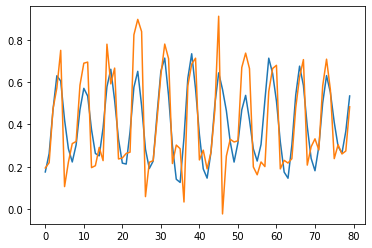

In [215]:
plt.plot(y_pred)
plt.plot(y_test)

In [210]:
ppp=X_train[:,0]
y_test

array([[ 0.19435406],
       [ 0.21939209],
       [ 0.47285619],
       [ 0.57262088],
       [ 0.75013686],
       [ 0.10640527],
       [ 0.22225925],
       [ 0.30967533],
       [ 0.31947214],
       [ 0.58571925],
       [ 0.68943254],
       [ 0.69466564],
       [ 0.1960721 ],
       [ 0.20514907],
       [ 0.29140096],
       [ 0.22914125],
       [ 0.77922149],
       [ 0.59174032],
       [ 0.66634992],
       [ 0.23697876],
       [ 0.24157938],
       [ 0.26326571],
       [ 0.26912414],
       [ 0.82371139],
       [ 0.8964832 ],
       [ 0.83875198],
       [ 0.05905366],
       [ 0.22130752],
       [ 0.2290605 ],
       [ 0.42160742],
       [ 0.63311165],
       [ 0.77979851],
       [ 0.71095624],
       [ 0.21539127],
       [ 0.30275111],
       [ 0.285425  ],
       [ 0.03367802],
       [ 0.5834654 ],
       [ 0.6854325 ],
       [ 0.71311298],
       [ 0.23244472],
       [ 0.27854288],
       [ 0.19019361],
       [ 0.26799141],
       [ 0.46498252],
       [ 0

In [211]:
model.evaluate(X_test_t,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.0630


0.06303088366985321

In [222]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.1507628854136117